In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pyrealm.pmodel import PModel, PModelEnvironment, SubdailyPModel, AcclimationModel
#from pyrealm.pmodel.functions import calc_ftemp_arrh, calc_ftemp_kphio
#from pyrealm.pmodel.subdaily import memory_effect
from pyrealm.pmodel.optimal_chi import OptimalChiPrentice14
from sklearn.metrics import mean_squared_error, r2_score


In [6]:

# def pModel_subdaily_area(
#     datetime_subdaily: np.ndarray,
#     temp_subdaily: np.ndarray,
#     ppfd_subdaily: np.ndarray,
#     vpd_subdaily: np.ndarray,
#     co2_subdaily: np.ndarray,
#     patm_subdaily: np.ndarray,
#     fpar_subdaily: np.ndarray,
#     days_memory: float,
#     window_center_i: int,
#     half_width_i: int,
# ):

#     # Calculate the photosynthetic environment
#     subdaily_env = PModelEnvironment(
#         tc=temp_subdaily,
#         vpd=vpd_subdaily,
#         co2=co2_subdaily,
#         patm=patm_subdaily,
#     )

#     # Create the fast slow scaler
#     fsscaler = SubdailyScaler(datetime_subdaily)

#     # Set the acclimation window as the values within a one hour window centred on noon
#     fsscaler.set_window(
#         window_center=np.timedelta64(window_center_i, "h"),
#         half_width=np.timedelta64(half_width_i, "m"),
#     )

#     # Fit the P Model with fast and slow responses
#     pmodel_subdaily = SubdailyPModel(
#         env=subdaily_env,
#         fs_scaler=fsscaler,
#         allow_holdover=True,
#         ppfd=ppfd_subdaily,
#         fapar=fpar_subdaily,
#     )

#     temp_acclim = fsscaler.get_daily_means(temp_subdaily)
#     co2_acclim = fsscaler.get_daily_means(co2_subdaily)
#     vpd_acclim = fsscaler.get_daily_means(vpd_subdaily)
#     patm_acclim = fsscaler.get_daily_means(patm_subdaily)
#     ppfd_acclim = fsscaler.get_daily_means(ppfd_subdaily)
#     fapar_acclim = fsscaler.get_daily_means(fpar_subdaily)

#     # Fit the P Model to the acclimation conditions
#     daily_acclim_env = PModelEnvironment(
#         tc=temp_acclim, vpd=vpd_acclim, co2=co2_acclim, patm=patm_acclim
#     )

#     pmodel_acclim = PModel(daily_acclim_env, kphio=1 / 8)
#     pmodel_acclim.estimate_productivity(fapar=fapar_acclim, ppfd=ppfd_acclim)
#     # pmodel_acclim.summarize()

#     ha_vcmax25 = 65330
#     ha_jmax25 = 43900
#     tk_acclim = temp_acclim + pmodel_subdaily.env.core_const.k_CtoK
#     vcmax25_acclim = pmodel_acclim.vcmax * (1 / calc_ftemp_arrh(tk_acclim, ha_vcmax25))
#     jmax25_acclim = pmodel_acclim.jmax * (1 / calc_ftemp_arrh(tk_acclim, ha_jmax25))
#     # Calculation of memory effect in xi, vcmax25 and jmax25
#     xi_real = memory_effect(
#         pmodel_acclim.optchi.xi, alpha=1 / days_memory, allow_holdover=True
#     )
#     vcmax25_real = memory_effect(
#         vcmax25_acclim, alpha=1 / days_memory, allow_holdover=True
#     )
#     jmax25_real = memory_effect(
#         jmax25_acclim, alpha=1 / days_memory, allow_holdover=True
#     )
#     tk_subdaily = subdaily_env.tc + pmodel_subdaily.env.core_const.k_CtoK

#     # Fill the realised jmax and vcmax from subdaily to daily
#     vcmax25_subdaily = fsscaler.fill_daily_to_subdaily(vcmax25_real)
#     jmax25_subdaily = fsscaler.fill_daily_to_subdaily(jmax25_real)

#     # Adjust to actual temperature at subdaily timescale
#     vcmax_subdaily = vcmax25_subdaily * calc_ftemp_arrh(tk=tk_subdaily, ha=ha_vcmax25)
#     jmax_subdaily = jmax25_subdaily * calc_ftemp_arrh(tk=tk_subdaily, ha=ha_jmax25)

#     # Interpolate xi to subdaily scale
#     xi_subdaily = fsscaler.fill_daily_to_subdaily(xi_real)

#     # Calculate the optimal chi, imposing the realised xi values
#     subdaily_chi = OptimalChiPrentice14(env=subdaily_env)
#     subdaily_chi.estimate_chi(xi_values=xi_subdaily)

#     # Calculate Ac
#     Ac_subdaily = (
#         vcmax_subdaily
#         * (subdaily_chi.ci - subdaily_env.gammastar)
#         / (subdaily_chi.ci + subdaily_env.kmm)
#     )

#     # Calculate J and Aj
#     phi = (1 / 8) * calc_ftemp_kphio(tc=temp_subdaily)
#     iabs = fpar_subdaily * ppfd_subdaily

#     J_subdaily = (4 * phi * iabs) / np.sqrt(1 + ((4 * phi * iabs) / jmax_subdaily) ** 2)

#     Aj_subdaily = (
#         (J_subdaily / 4)
#         * (subdaily_chi.ci - subdaily_env.gammastar)
#         / (subdaily_chi.ci + 2 * subdaily_env.gammastar)
#     )

#     # Calculate GPP and convert from micromols to micrograms
#     GPP_subdaily = (
#         np.minimum(Ac_subdaily, Aj_subdaily)
#         * pmodel_subdaily.env.core_const.k_c_molmass
#     )

#     gC_to_mumol = 0.0833  # 1 µg C m⁻² s⁻¹ × (1 µmol C / 12.01 µg C) × (1 µmol CO₂ / 1 µmol C) = 0.0833 µmol CO₂ m⁻² s⁻¹
#     GPP_subdaily *= gC_to_mumol
#     # print(
#     #     f"GPPmean {np.nanmean(GPP_subdaily)} at {days_memory} days_mem at {window_center_i}h {half_width_i}m"
#     # )

#     return GPP_subdaily



In [ ]:

# remember to change the path of your file

start_year = 2012
end_year = 2013

datetime_subdaily=np.arange(datetime(start_year, 1, 1, 0, 00),
              datetime(end_year,1,1,0,0),
              np.timedelta64(30, "m"))

# site_file = "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_CH-Lae_FLUXNET2015_FULLSET_2004-2014_1-4/FLX_CH-Lae_FLUXNET2015_FULLSET_HH_2004-2014_1-4.csv"
# site_file = "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_IT-Ren_FLUXNET2015_FULLSET_1998-2013_1-4/FLX_IT-Ren_FLUXNET2015_FULLSET_HH_1998-2013_1-4.csv"
site_file = "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_CH-Dav_FLUXNET2015_FULLSET_1997-2014_1-4/FLX_CH-Dav_FLUXNET2015_FULLSET_HH_1997-2014_1-4.csv"

ds = pd.read_csv(site_file)
# extract site name from the file name CH-Dav
site_name = site_file.split("/")[-1].split("_")[1]


# filter ds by ds["TIMESTAMP_START"] with format YYYMMDDHHSS to start_year till 1.1. 00:00h of end_year
ds["TIMESTAMP_START"] = pd.to_datetime(ds["TIMESTAMP_START"], format='%Y%m%d%H%M')
ds = ds[(ds["TIMESTAMP_START"] >= datetime(start_year, 1, 1, 0, 00)) & (ds["TIMESTAMP_START"] < datetime(end_year, 1, 1, 0, 00))]
ds = ds.set_index("TIMESTAMP_START")

# Extract the key half hourly timestep variables as numpy arrays
site_temp = ds.loc[:, 'TA_F_MDS'] # daily temperature, unit degree (°C)
site_temp[site_temp < -25] = np.nan
site_swin = ds.loc[:, 'SW_IN_F_MDS']  # shortwave radiation, unit W/m2
site_ppfd = ds.loc[:, 'PPFD_IN'] # Shortwave radiation (W/m²) × 0.50 -> PAR (W/m²) × 4.6 -> PPFD (umol/m²/s)
site_vpd = ds.loc[:, 'VPD_F_MDS'] * 100  # vpd, unit: hPa converted to Pa
site_co2 = ds.loc[:, 'CO2_F_MDS']  # CO2, unit ppm
site_patm = ds.loc[:, 'PA_F'] * 1000  # site pressure, unit kPa converted to Pa
site_prep = ds.loc[:,'P_F']
site_gpp = ds.loc[:,'GPP_DT_VUT_USTAR50']  # GPP, unit: gC/m2/d


#site_fapar = ds.loc[:, 'FPAR']  # fapar
#ds.columns
#site_ppfd = ds.loc[:, 'PPFD_IN'] 
site_ppfd.max()
#mod_files =  "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_IT-Ren_FLUXNET2015_FULLSET_1998-2013_1-4/IT-Ren_MOD15A2H_Fpar_500m_1997-12-12_2014-01-20.xlsx" 
#myd_files = "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_IT-Ren_FLUXNET2015_FULLSET_1998-2013_1-4/IT-Ren_MYD15A2H_Fpar_500m_1997-12-12_2014-01-20.xlsx"

mod_files = "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_CH-Dav_FLUXNET2015_FULLSET_1997-2014_1-4/CH-Dav_MOD15A2H_Lai_500m_1996-12-12_2015-01-20.xlsx"
myd_files = "/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_CH-Dav_FLUXNET2015_FULLSET_1997-2014_1-4/CH-Dav_MYD15A2H_Lai_500m_1996-12-12_2015-01-20.xlsx" 
# Process MOD and MYD files
dfs_modis = []
for file_path in [mod_files, myd_files]:
    df = pd.read_excel(file_path)[["calendar_date", "value"]].assign(
        value=lambda x: x["value"] * 0.0001  # TODO: scale Lai diffently
    )  # sclaing factor from user guide: https://lpdaac.usgs.gov/documents/103/MOD13_User_Guide_V6.pdf
    file_parts = file_path.split("/")[-1]
    file_parts2 = file_parts.split("_")[2:6]
    if file_parts2[0] == "250m":
        file_type = "_".join(file_parts2)
    else:
        file_type = "_".join(file_parts2[:-1])
    df.rename(columns={"value": file_type}, inplace=True)
    dfs_modis.append(df)

# Merge dataframes based on 'calendar_date'
df_modis = dfs_modis[0]
for df in dfs_modis[1:]:
    df_modis = pd.merge(
        df_modis, df, on="calendar_date", how="outer", suffixes=("_x", "_y")
    )

for column in df_modis.columns:
    if column.endswith("_x"):
        base_column = column[:-2]  # Remove suffix '_x'
        if base_column + "_y" in df_modis.columns:
            df_modis[column].fillna(df_modis[base_column + "_y"], inplace=True)
            df_modis.drop(columns=[base_column + "_y"], inplace=True)
            df_modis.rename(columns={column: base_column}, inplace=True)

df_modis.sort_values(by="calendar_date", inplace=True)
df_modis.reset_index(drop=True, inplace=True)
df_modis["calendar_date"] = pd.to_datetime(df_modis["calendar_date"])
df_modis.set_index("calendar_date", inplace=True)
# Interpolation
subdaily_series = pd.Series(index=datetime_subdaily, dtype=float)

# Reindex with interpolation
site_fapar = df_modis["Fpar_500m_1997-12-12"].reindex(
    subdaily_series.index.union(df_modis.index)
).interpolate("time").reindex(subdaily_series.index)
site_fapar = site_fapar*100 # 100 due to MODIS scaling factor, and 100 to convert to percent
#clip to zero 
site_vpd.values[site_vpd.values < 0] = 0
site_ppfd.values[site_ppfd.values < 0] = 0
# site_fapar.max()

pyrealm/3353246404.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


FileNotFoundError: [Errno 2] No such file or directory: '/scratch/c7071034/DATA/Fluxnet2015/Alps/FLX_CH-Dav_FLUXNET2015_FULLSET_1997-2014_1-4/H-Dav_MOD15A2H_Lai_500m_1996-12-12_2015-01-20.xlsx'

pyrealm/pmodel.py:409: UserWarning: 
    Pyrealm 2.0.0 uses a new default for the quantum yield of photosynthesis (phi0=1/8).
    You may need to change settings to duplicate results from pyrealm 1.0.0.
            


pyrealm/pmodel.py:409: UserWarning: 
    Pyrealm 2.0.0 uses a new default for the quantum yield of photosynthesis (phi0=1/8).
    You may need to change settings to duplicate results from pyrealm 1.0.0.
            


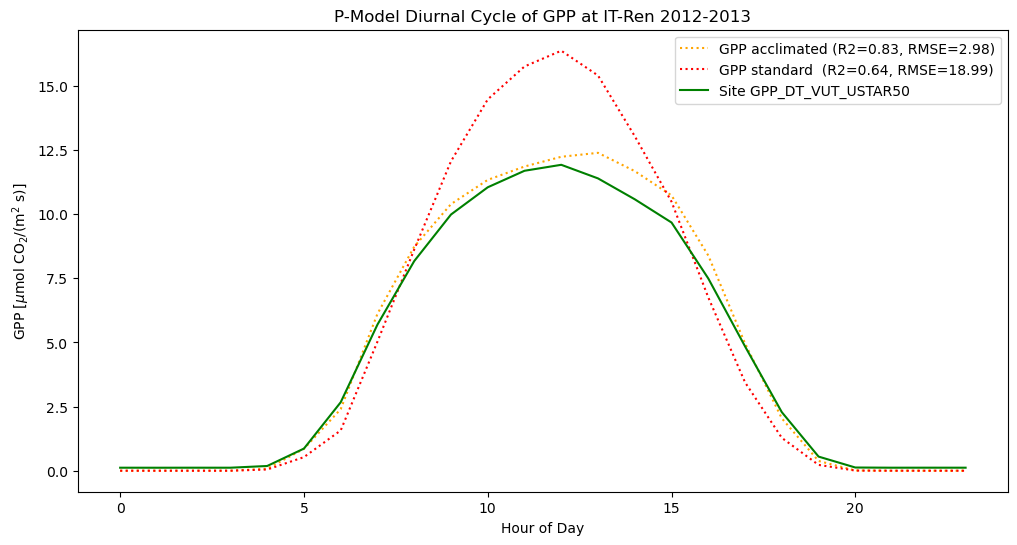

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

gC_to_mumol = 0.0833  # Conversion: gC → µmol CO₂

# Create environment with all inputs
env = PModelEnvironment(
    tc=site_temp.values,
    co2=site_co2.values,
    patm=site_patm.values,
    vpd=site_vpd.values,
    fapar=site_fapar.values,
    ppfd=site_ppfd.values
)

# Run P Model
model = PModel(env)

pmodel_subdaily_std = model.gpp*gC_to_mumol

# Prepare the photosynthetic environment with all inputs
subdaily_env = PModelEnvironment(
    tc=site_temp.values,
    vpd=site_vpd.values,
    co2=site_co2.values,
    patm=site_patm.values,
    ppfd=site_ppfd.values,
    fapar=site_fapar.values,
)
datetime_subdaily_df = site_temp.index
datetime_subdaily = pd.to_datetime(datetime_subdaily_df).to_numpy()
# Set acclimation window parameters
window_cent = 13
half_wdth = 92
acclim_model = AcclimationModel(datetime_subdaily, allow_holdover=True, alpha=1 / 37)
acclim_model.set_window(
    window_center=np.timedelta64(window_cent, "h"),
    half_width=np.timedelta64(half_wdth, "m"),
)

# Fit the P Model with fast and slow responses
pmodel_subdaily = SubdailyPModel(
    env=subdaily_env,
    acclim_model=acclim_model
)
pmodel_subdaily_acc = pmodel_subdaily.gpp * gC_to_mumol

# Create a DataFrame with the datetime index and the GPP values
df_gpp = pd.DataFrame({
    'datetime': datetime_subdaily,
    'pmodel_subdaily_acc': pmodel_subdaily_acc,
    'model_gpp_std': pmodel_subdaily_std,
    'site_gpp': site_gpp.values
})


# Extract the hour from the datetime index
df_gpp['hour'] = df_gpp['datetime'].dt.hour

# Calculate the hourly averages
#hourly_avg_acc_tune = df_gpp.groupby('hour')['pmodel_subdaily_acc_tune'].mean()
hourly_avg_model_acc = df_gpp.groupby('hour')['pmodel_subdaily_acc'].mean()
hourly_avg_model_std = df_gpp.groupby('hour')['model_gpp_std'].mean()
hourly_avg_site = df_gpp.groupby('hour')['site_gpp'].mean()

# Clean data from NaN values
df_gpp_clean = df_gpp.dropna(subset=['model_gpp_std', 'site_gpp','pmodel_subdaily_acc'])

# Calculate R2 and RMSE for pmodel_subdaily_acc_tune
#r2_slow_fast = r2_score(df_gpp_clean['site_gpp'], df_gpp_clean['pmodel_subdaily_acc_tune'])
#rmse_slow_fast = sqrt(mean_squared_error(df_gpp_clean['site_gpp'], df_gpp_clean['pmodel_subdaily_acc_tune']))
# Calculate R2 and RMSE for pmodel_subdaily_acc
r2_slow_fast = r2_score(df_gpp_clean['site_gpp'], df_gpp_clean['pmodel_subdaily_acc'])
rmse_slow_fast = sqrt(mean_squared_error(df_gpp_clean['site_gpp'], df_gpp_clean['pmodel_subdaily_acc']))
# Calculate R2 and RMSE for model_gpp_std
r2_err = r2_score(df_gpp_clean['site_gpp'], df_gpp_clean['model_gpp_std'])
rmse_err = mean_squared_error(df_gpp_clean['site_gpp'], df_gpp_clean['model_gpp_std'])

# Plot the diurnal cycles
plt.figure(figsize=(12, 6))

#plt.plot(hourly_avg_acc_tune.index, hourly_avg_acc_tune, label=f'GPP acclimated tuned (R2={r2_slow_fast:.2f}, RMSE={rmse_slow_fast:.2f})', color='blue',linestyle='dotted')
plt.plot(hourly_avg_model_acc.index, hourly_avg_model_acc, label=f'GPP acclimated (R2={r2_slow_fast:.2f}, RMSE={rmse_slow_fast:.2f})', color='orange',linestyle='dotted')
plt.plot(hourly_avg_model_std.index, hourly_avg_model_std, label=f'GPP standard  (R2={r2_err:.2f}, RMSE={rmse_err:.2f})', color='red',linestyle='dotted')
plt.plot(hourly_avg_site.index, hourly_avg_site, label='Site GPP_DT_VUT_USTAR50', color='green')

plt.title(f'P-Model Diurnal Cycle of GPP at {site_name} {start_year}-{end_year}')
plt.xlabel('Hour of Day')
plt.ylabel(r'GPP [$\mu$mol CO$_2$/(m$^2$ s)]')
plt.legend()
plt.show()
